<a href="https://colab.research.google.com/github/jahid12ry/jahid_hassan_furkan/blob/main/PDS_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving kaggle.json to kaggle.json
{'kaggle.json': b'{"username":"jahidhassan123","key":"7c06b866a6772a93bef8110ca8e68446"}'}


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!KAGGLE_CONFIG_DIR=/kaggle/working kaggle datasets download -d hellbuoy/car-price-prediction

Dataset URL: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
License(s): unknown
  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 30.5MB/s]


In [ ]:
import zipfile
with  zipfile.ZipFile('car-price-prediction.zip', 'r') as zip_ref:
  zip_ref.extractall('datafolder')

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis, shapiro

In [ ]:
df = pd.read_csv('datafolder/CarPrice_Assignment.csv')
X = df.drop(columns=['price', 'car_ID', 'CarName'])
y = df['price']

In [ ]:
print(f"Variables en el dataset: {df.columns.tolist()}")
print(f"Variables en matriz de diseño X (en contrucción): {X.columns.tolist()}")

Variables en el dataset: ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
Variables en matriz de diseño X (en contrucción): ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


In [ ]:
# Seleccionar solo las columnas categóricas
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

print("Columnas numericas:", numeric_cols.tolist())
print("\nColumnas categóricas:", categorical_cols.tolist())

Columnas numericas: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

Columnas categóricas: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [ ]:
def value_unique(str_col):
    return len(df[str_col].unique().tolist())/df.shape[0]

for col in categorical_cols:
    unique_ratio = value_unique(col)
    print(f"Columna '{col}': proporción de valores únicos = {unique_ratio:.2f}")

Columna 'fueltype': proporción de valores únicos = 0.01
Columna 'aspiration': proporción de valores únicos = 0.01
Columna 'doornumber': proporción de valores únicos = 0.01
Columna 'carbody': proporción de valores únicos = 0.02
Columna 'drivewheel': proporción de valores únicos = 0.01
Columna 'enginelocation': proporción de valores únicos = 0.01
Columna 'enginetype': proporción de valores únicos = 0.03
Columna 'cylindernumber': proporción de valores únicos = 0.03
Columna 'fuelsystem': proporción de valores únicos = 0.04


In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.duplicated().sum()

0

<Axes: >

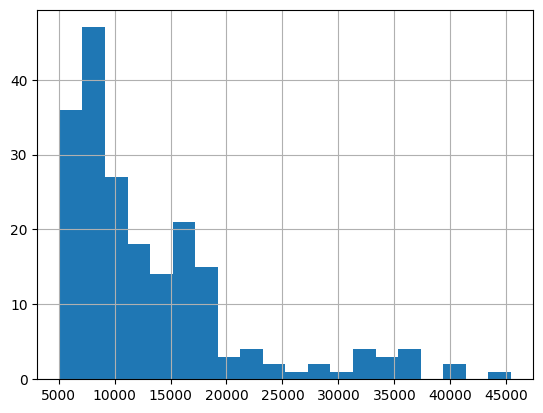

In [ ]:
y.hist(bins=20)

<Axes: >

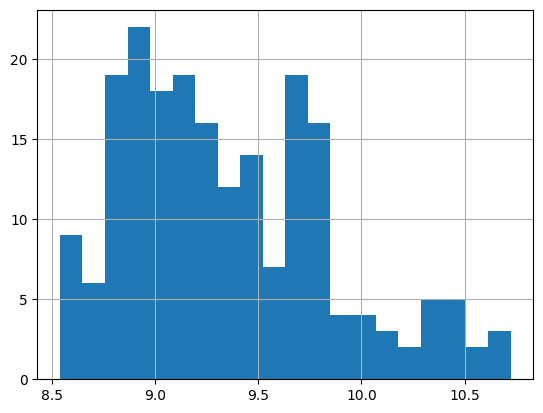

In [ ]:
np.log(y).hist(bins=20)

In [ ]:
# Realizar la prueba de Shapiro-Wilk
stat, p_valor = shapiro(y)

# Resultados
print("Estadístico de Shapiro-Wilk:", stat)
print("Valor p:", p_valor)

# Interpretación
if p_valor > 0.05:
    print("No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución normal")

Estadístico de Shapiro-Wilk: 0.8006648595947646
Valor p: 1.8490930057446264e-15
Se rechaza la hipótesis nula: los datos no siguen una distribución normal


In [ ]:
stat, p_valor = shapiro(np.log(y))

print("Estadístico de Shapiro-Wilk:", stat)
print("Valor p:", p_valor)

if p_valor > 0.05:
    print("No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal")
else:
    print("Se rechaza la hipótesis nula: los datos no siguen una distribución normal")


Estadístico de Shapiro-Wilk: 0.9486745828116384
Valor p: 1.0735488351399919e-06
Se rechaza la hipótesis nula: los datos no siguen una distribución normal


In [ ]:
# Calcular el logaritmo de 'price'
df['log_price'] = np.log(df['price'])

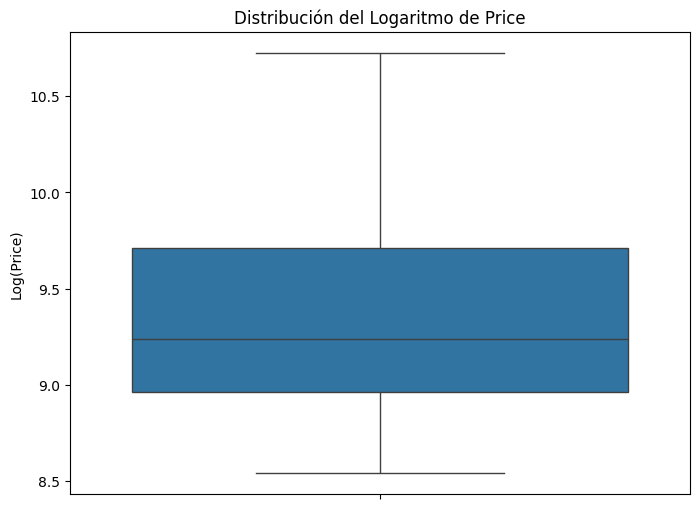

In [ ]:
# Crear el boxplot del logaritmo de 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(y='log_price', data=df)
plt.title('Distribución del Logaritmo de Price')
plt.ylabel('Log(Price)')
plt.show()

In [ ]:
# Crear Variable categorica price_category

cuantiles = df['price'].quantile([0.33, 0.66])
df['price_category'] = pd.cut(
    df['price'],
    bins=[-np.inf, cuantiles[0.33], cuantiles[0.66], np.inf],
    labels=['bajo', 'medio', 'alto']
)
df['price_category'].value_counts()

,count
price_category,
alto,70
bajo,68
medio,67


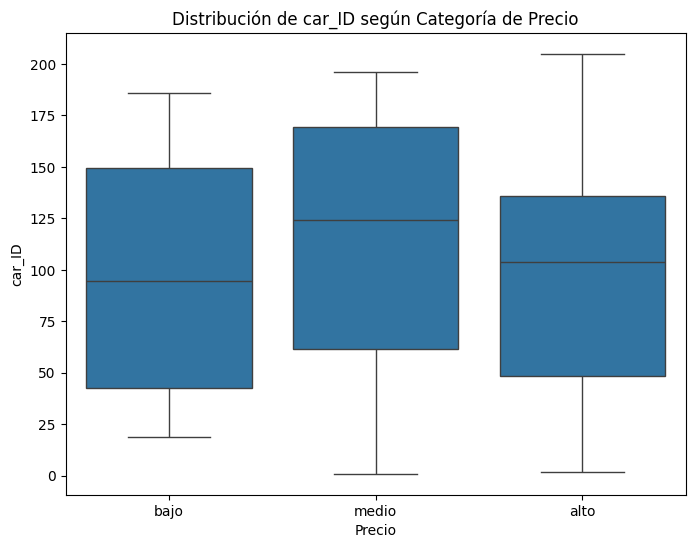

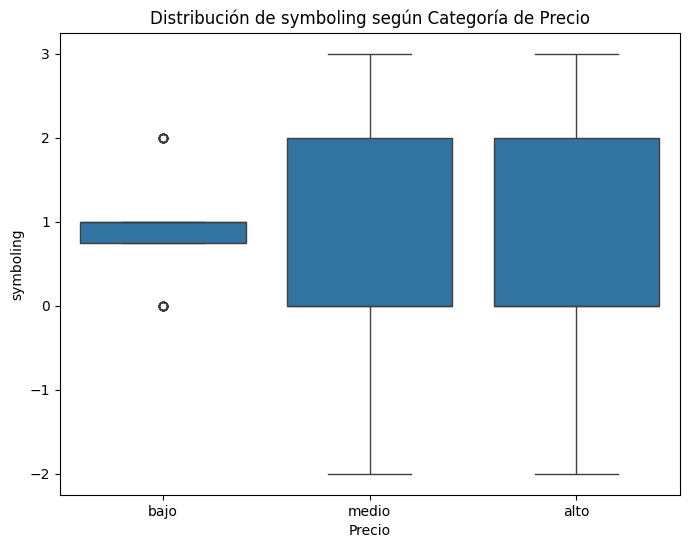

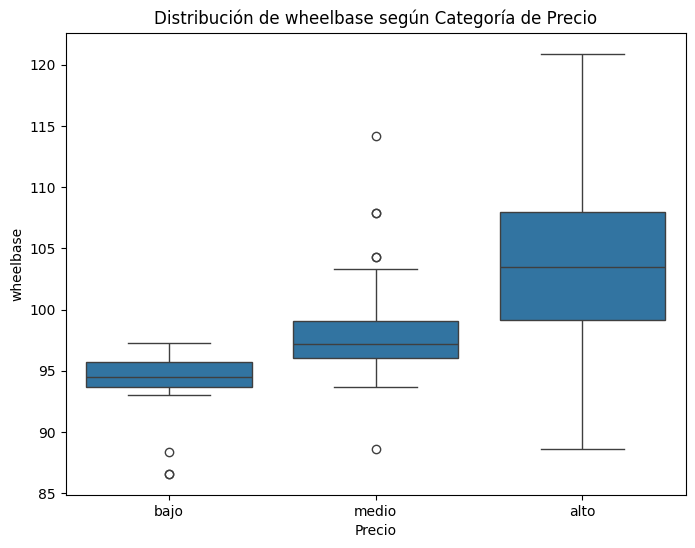

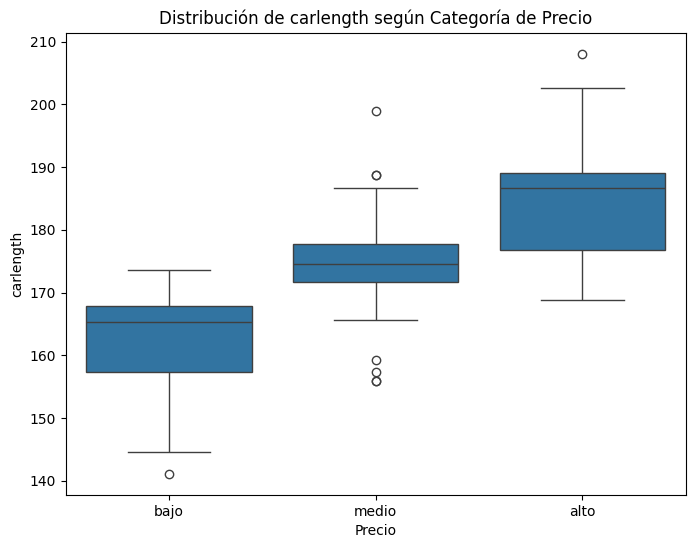

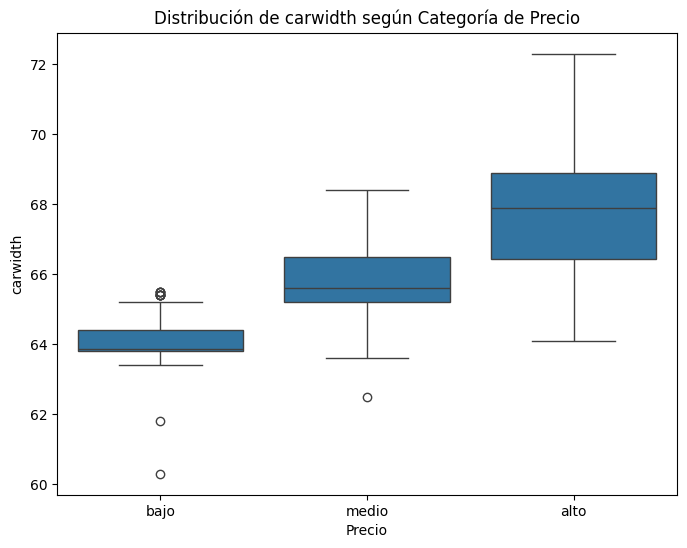

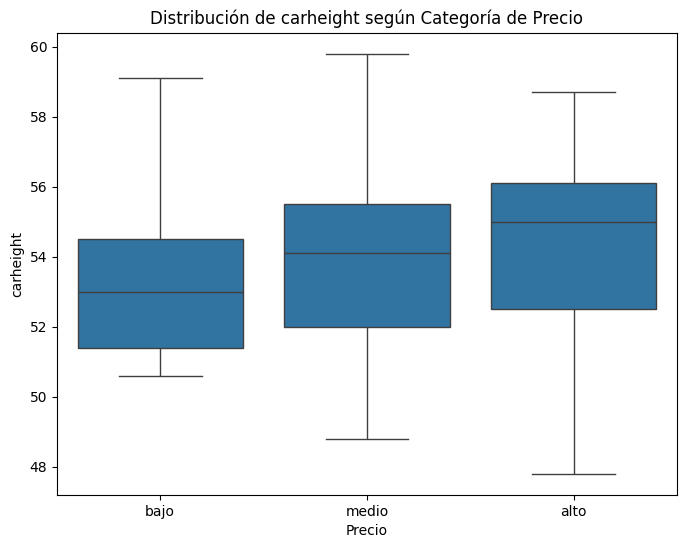

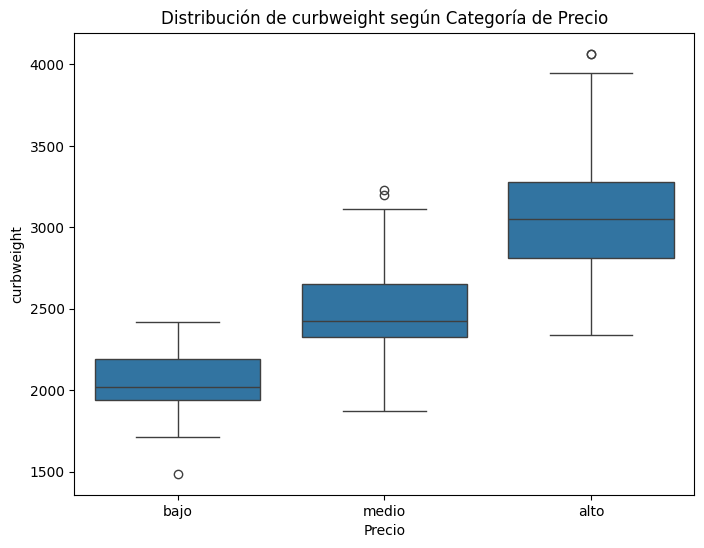

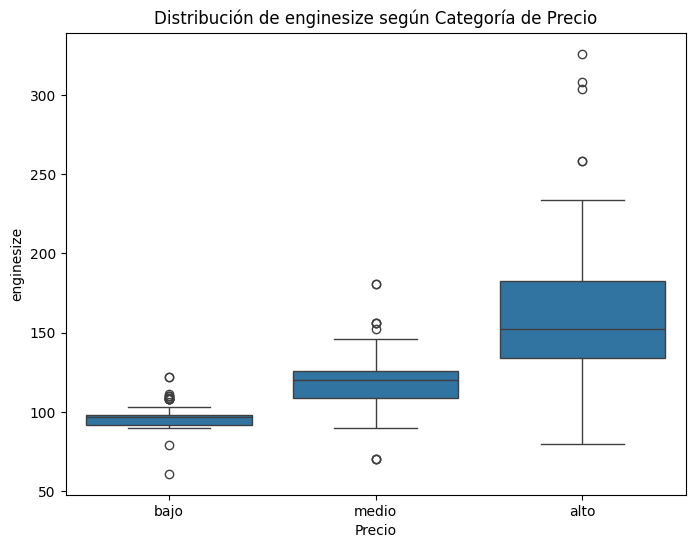

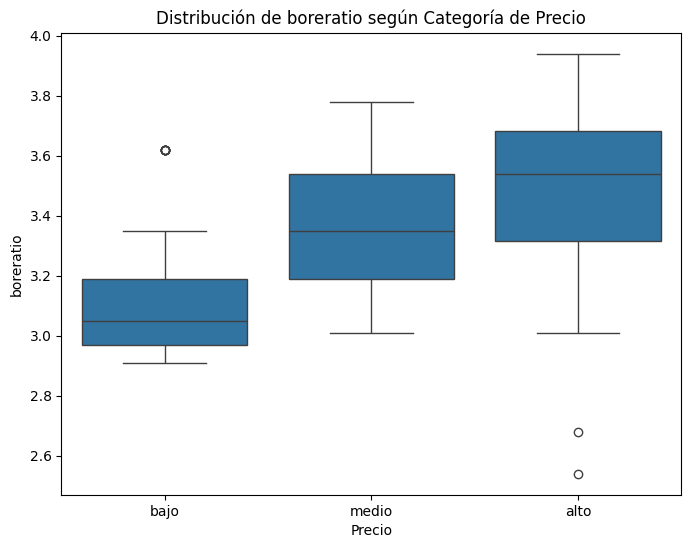

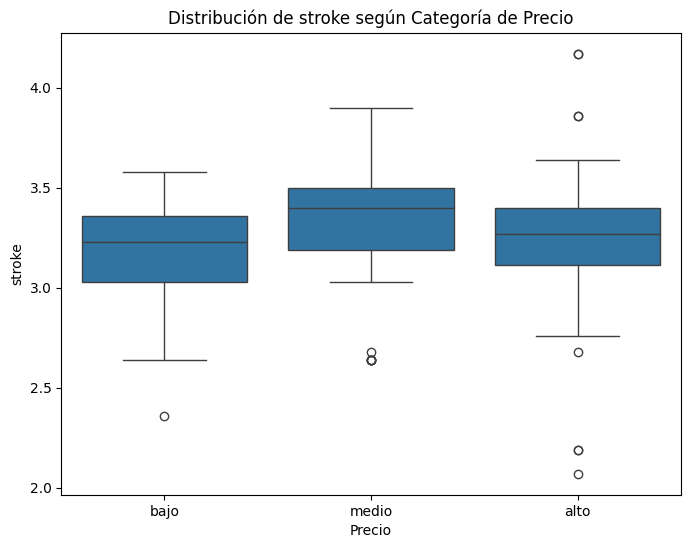

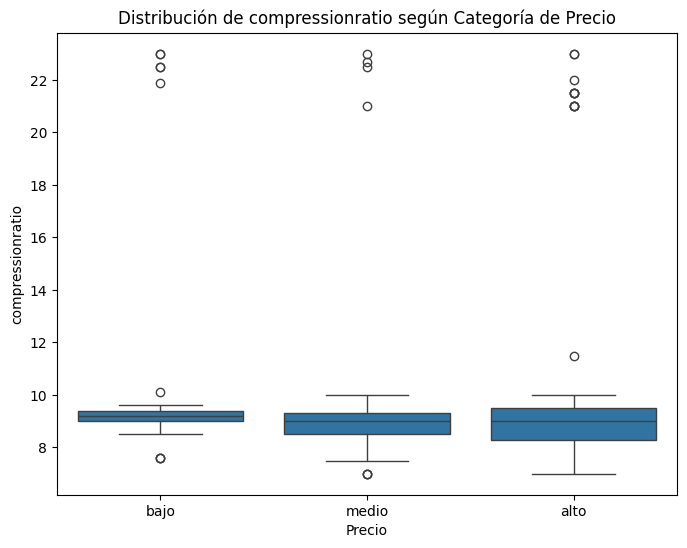

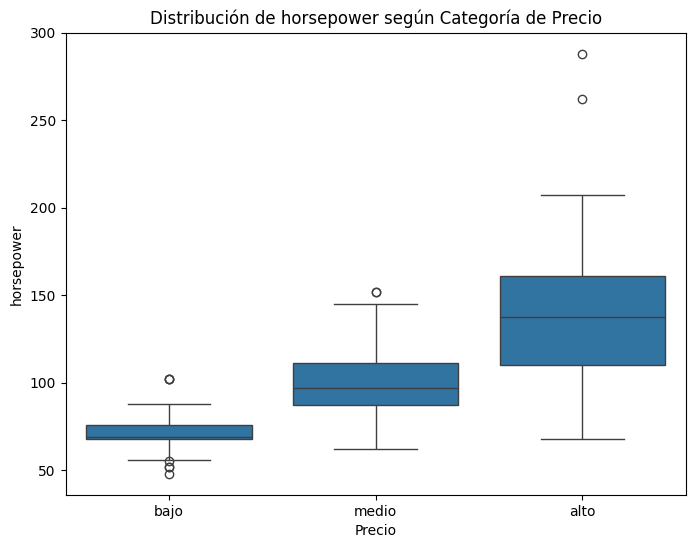

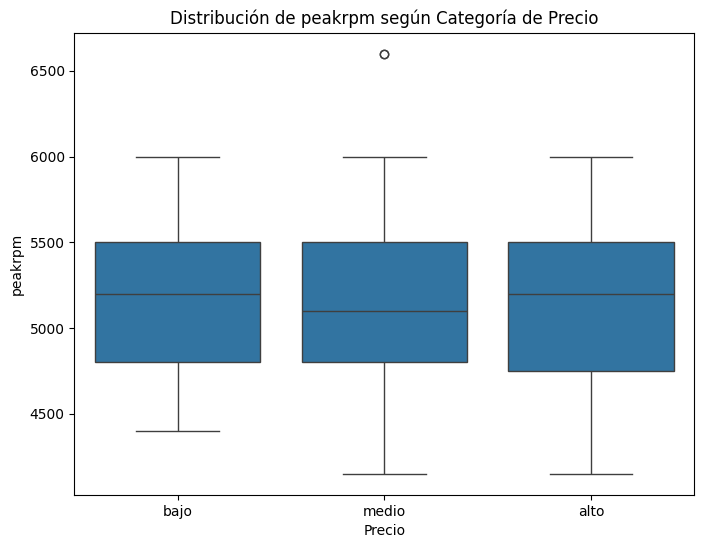

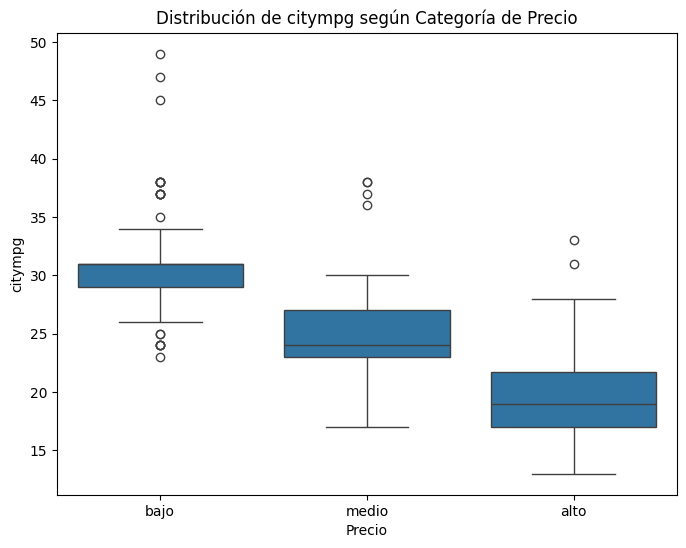

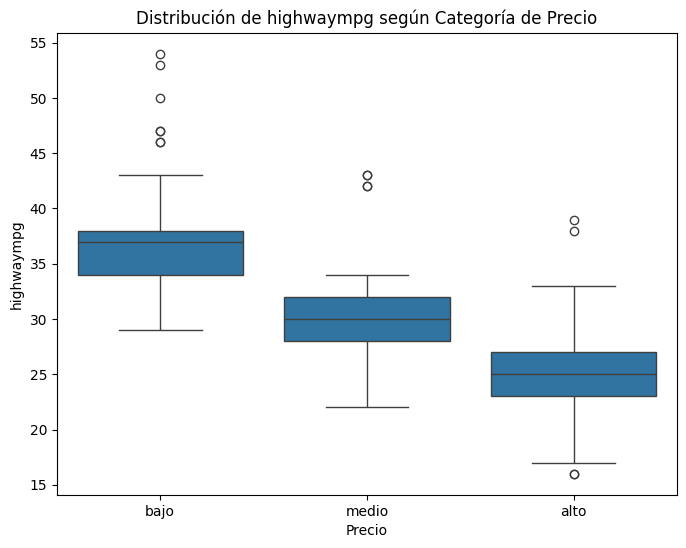

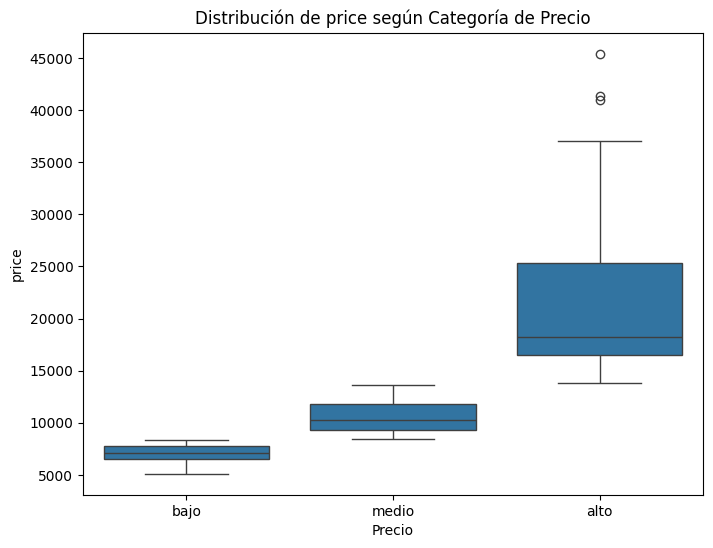

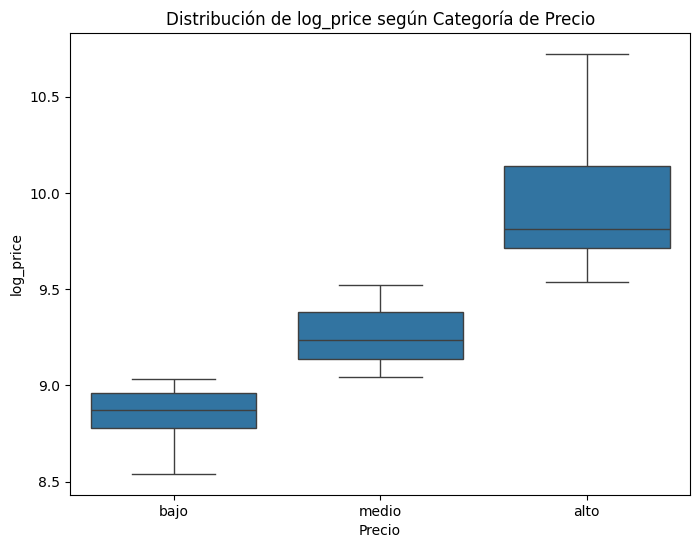

In [ ]:
# Bucle para crear un boxplot para cada columna numérica
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='price_category', y=column, data=df)
    plt.xlabel('Precio')
    plt.ylabel(column)
    plt.title(f'Distribución de {column} según Categoría de Precio')
    plt.show()

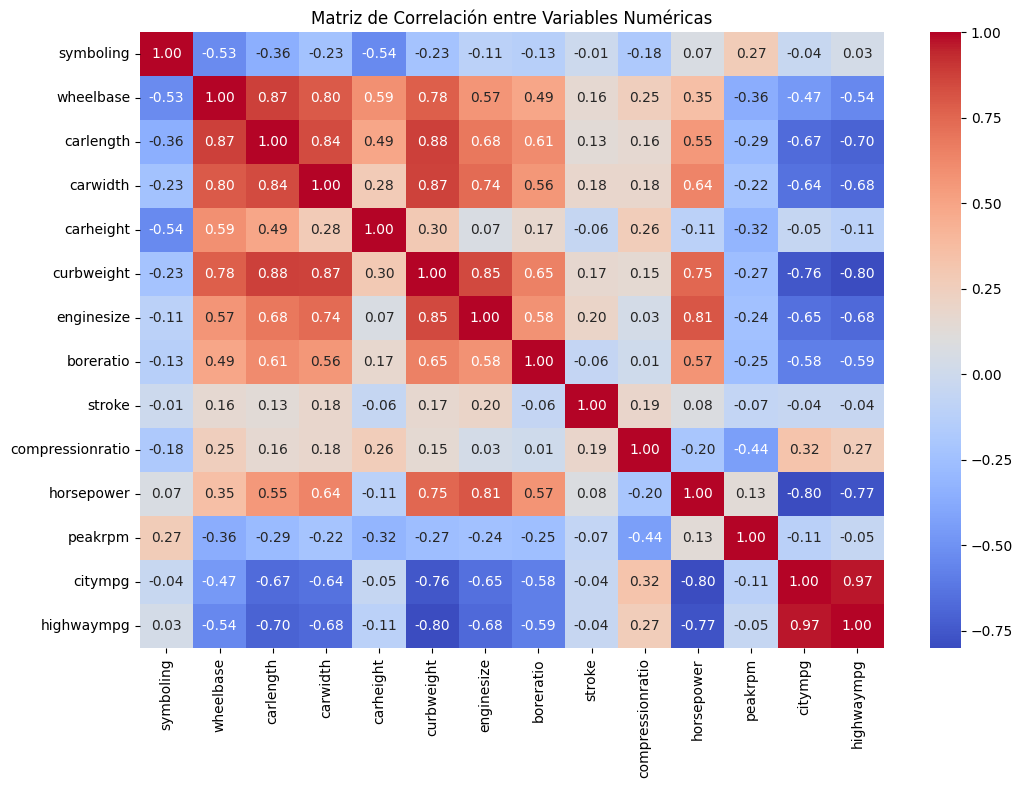

In [ ]:
# Calcular la matriz de correlación
corr_matrix = df[numeric_cols].corr()

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_cols

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [ ]:
X.select_dtypes(include=['object']).columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [ ]:
# Convertir las variables categóricas en valores numéricos usando LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Guardar el codificador para uso futuro si es necesario

In [ ]:
X

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,...,3,145,3,3.01,3.40,23.0,106,4800,26,27


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
# Agregar la constante para el intercepto en la regresión
X_with_constant = sm.add_constant(X)

In [ ]:
X_with_constant

,const,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.0,3,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,1.0,3,1,0,1,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1.0,1,1,0,1,2,2,0,94.5,171.2,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,1.0,2,1,0,0,3,1,0,99.8,176.6,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,1.0,2,1,0,0,3,0,0,99.4,176.6,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,-1,1,0,0,3,2,0,109.1,188.8,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,1.0,-1,1,1,0,3,2,0,109.1,188.8,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,1.0,-1,1,0,0,3,2,0,109.1,188.8,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,1.0,-1,0,1,0,3,2,0,109.1,188.8,...,3,145,3,3.01,3.40,23.0,106,4800,26,27


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_with_constant, y, test_size=0.2, random_state=42)

In [ ]:
# Ajustar el modelo de regresión lineal usando el conjunto de entrenamiento
model = sm.OLS(y_train, X_train).fit()

# Mostrar el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     52.74
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           1.59e-57
Time:                        12:18:41   Log-Likelihood:                -1514.8
No. Observations:                 164   AIC:                             3078.
Df Residuals:                     140   BIC:                             3152.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.565e+04    1.9e+04  

In [ ]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
# Dividir los datos en entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Definir el modelo
model = LinearRegression()

In [ ]:
# Selección hacia adelante
sfs_forward = SFS(model,
                  k_features='best',
                  forward=True,
                  floating=False,
                  scoring='r2',
                  cv=5)
sfs_forward = sfs_forward.fit(X_train, y_train)

print("Selección hacia adelante - Predictores seleccionados:", sfs_forward.k_feature_names_)

# Selección hacia atrás
sfs_backward = SFS(model,
                   k_features='best',
                   forward=False,
                   floating=False,
                   scoring='r2',
                   cv=5)
sfs_backward = sfs_backward.fit(X_train, y_train)

print("Selección hacia atrás - Predictores seleccionados:", sfs_backward.k_feature_names_)

# Selección paso a paso
sfs_stepwise = SFS(model,
                   k_features='best',
                   forward=True,
                   floating=True,
                   scoring='r2',
                   cv=5)
sfs_stepwise = sfs_stepwise.fit(X_train, y_train)

print("Selección paso a paso - Predictores seleccionados:", sfs_stepwise.k_feature_names_)

Selección hacia adelante - Predictores seleccionados: ('const', 'fueltype', 'carbody', 'enginelocation', 'wheelbase', 'carwidth', 'curbweight', 'enginetype', 'enginesize', 'boreratio', 'stroke', 'peakrpm', 'highwaympg')
Selección hacia atrás - Predictores seleccionados: ('symboling', 'fueltype', 'carbody', 'enginelocation', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'peakrpm', 'highwaympg')
Selección paso a paso - Predictores seleccionados: ('const', 'fueltype', 'carbody', 'enginelocation', 'wheelbase', 'carwidth', 'curbweight', 'enginetype', 'enginesize', 'boreratio', 'stroke', 'peakrpm', 'highwaympg')


In [ ]:
print(sfs_stepwise.k_feature_names_)


('const', 'fueltype', 'carbody', 'enginelocation', 'wheelbase', 'carwidth', 'curbweight', 'enginetype', 'enginesize', 'boreratio', 'stroke', 'peakrpm', 'highwaympg')


In [ ]:
X_stepwise = X[['symboling', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'carwidth', 'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'peakrpm']]

In [ ]:
X_stepwise

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,curbweight,enginesize,fuelsystem,boreratio,stroke,peakrpm
0,3,0,1,0,2,0,64.1,2548,130,5,3.47,2.68,5000
1,3,0,1,0,2,0,64.1,2548,130,5,3.47,2.68,5000
2,1,0,1,2,2,0,65.5,2823,152,5,2.68,3.47,5000
3,2,0,0,3,1,0,66.2,2337,109,5,3.19,3.40,5500
4,2,0,0,3,0,0,66.4,2824,136,5,3.19,3.40,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,0,3,2,0,68.9,2952,141,5,3.78,3.15,5400
201,-1,1,0,3,2,0,68.8,3049,141,5,3.78,3.15,5300
202,-1,0,0,3,2,0,68.9,3012,173,5,3.58,2.87,5500
203,-1,1,0,3,2,0,68.9,3217,145,3,3.01,3.40,4800


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_stepwise, y, test_size=0.2, random_state=0)

In [ ]:
import statsmodels.api as sm

# Add constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Display the summary
print(model_sm.summary())

# Predict with statsmodels
y_pred_sm = model_sm.predict(sm.add_constant(X_test))

# Evaluate the model performance
from sklearn.metrics import mean_squared_error, r2_score
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_sm)}')
print(f'R-squared: {r2_score(y_test, y_pred_sm)}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     102.8
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           9.98e-68
Time:                        12:21:22   Log-Likelihood:                -1513.3
No. Observations:                 164   AIC:                             3055.
Df Residuals:                     150   BIC:                             3098.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.895e+04   1.29e+04     -4.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('datafolder/CarPrice_Assignment.csv')
print(data.head())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [ ]:
from sklearn.model_selection import train_test_split

# Assume 'price' is the target and other columns are features
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Sample data
data = pd.DataFrame({
    'year': [2010, 2011, 2012, 2013, 2014],
    'mileage': [60000, 50000, 30000, 40000, 35000],
    'price': [5000, 8000, 10000, 12000, 11000]
})

# Split data into features and target
X = data[['year', 'mileage']]  # Features
y = data['price']              # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make a prediction (just for demonstration)
prediction = model.predict(X_test)
print(prediction)


[7313.7254902]


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
predictions = model.predict(X_test)
print(predictions)


[7313.7254902]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("R²:", r2_score(y_test, predictions))


MAE: 686.2745098038577
MSE: 470972.7028065251
R²: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
new_car = [[2020, 25000]]  # Assuming 'year' and 'mileage' are the columns used
predicted_price = model.predict(new_car)
print("Predicted Price: ", predicted_price)


Predicted Price:  [20000.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the R-squared (R²)
r2 = r2_score(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the accuracy metrics
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared (R²): nan
Mean Absolute Error (MAE): 686.2745098038577
Mean Squared Error (MSE): 470972.7028065251
Root Mean Squared Error (RMSE): 686.2745098038577


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Sample data (Replace this with your actual car dataset)
data = pd.DataFrame({
    'year': [2010, 2011, 2012, 2013, 2014],
    'mileage': [60000, 50000, 30000, 40000, 35000],
    'price': [5000, 8000, 10000, 12000, 11000]
})

# Split data into features (X) and target (y)
X = data[['year', 'mileage']]  # Features: year and mileage
y = data['price']              # Target: price

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate accuracy metrics
r2 = r2_score(y_test, predictions)  # R-squared
mae = mean_absolute_error(y_test, predictions)  # Mean Absolute Error
mse = mean_squared_error(y_test, predictions)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Output the predictions and accuracy metrics
print("Predictions on Test Set:")
for i in range(len(predictions)):
    print(f"Predicted Price: ${predictions[i]:,.2f} | Actual Price: ${y_test.iloc[i]:,.2f}")

print("\nAccuracy Metrics:")
print(f"R-squared (R²): {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Predictions on Test Set:
Predicted Price: $7,313.73 | Actual Price: $8,000.00

Accuracy Metrics:
R-squared (R²): nan
Mean Absolute Error (MAE): 686.27
Mean Squared Error (MSE): 470972.70
Root Mean Squared Error (RMSE): 686.27


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
